# Duration analyses

In [1]:
%matplotlib inline
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# load data
spoti_df = pd.read_csv('../output_data/spotipy_data.csv')
spoti_df.head()

,Unnamed: 0,Year,id,artist id,track name,artist name,artist genre,track popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,2017,7qiZfU4dY1lWllzX7mPBI3,6eUKZXaKkcviH0Ku9w2n3V,Shape of You,Ed Sheeran,"['pop', 'singer-songwriter pop', 'uk pop']",88,0.825,0.652,...,0.0,0.0931,0.931,95.977,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,233713,4
1,1,2017,0pqnGHJpmpxLKifKRmU6WP,53XhwfbYqKCa1cC15pYq2q,Believer,Imagine Dragons,"['modern rock', 'pop', 'rock']",89,0.776,0.780,...,0.0,0.0810,0.666,124.949,audio_features,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4
2,2,2017,6habFhsOp2NvshLv26DqMb,4V8Sr092TqfHkfAA5fXXqG,Despacito,Luis Fonsi,"['latin pop', 'puerto rican pop']",81,0.655,0.797,...,0.0,0.0670,0.839,177.928,audio_features,spotify:track:6habFhsOp2NvshLv26DqMb,https://api.spotify.com/v1/tracks/6habFhsOp2Nv...,https://api.spotify.com/v1/audio-analysis/6hab...,229360,4
3,3,2017,1PSBzsahR2AKwLJgx8ehBj,6TIYQ3jFPwQSRmorSezPxX,Bad Things (with Camila Cabello),Machine Gun Kelly,"['ohio hip hop', 'pop rap']",73,0.697,0.691,...,0.0,0.1850,0.305,137.853,audio_features,spotify:track:1PSBzsahR2AKwLJgx8ehBj,https://api.spotify.com/v1/tracks/1PSBzsahR2AK...,https://api.spotify.com/v1/audio-analysis/1PSB...,239293,4
4,4,2017,5knuzwU65gJK7IF5yJsuaW,6MDME20pz9RveH9rEXvrOM,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,"['pop', 'uk dance', 'uk funky']",76,0.720,0.763,...,0.0,0.1800,0.742,101.965,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4


In [3]:
# convert milliseconds to minutes
def mil_to_minf(milliseconds):
    minutes_float = milliseconds / 60000
    return minutes_float

# convert minutes to milliseconds
def minf_to_mil(minutes_float):
    milliseconds = minutes_float * 60000
    return milliseconds

# convert milliseconds to minute_seconds
def mil_to_minsec(milliseconds):
    seconds, milliseconds = divmod(milliseconds, 1000)
    minutes, seconds = divmod(seconds, 60)
    return minutes, seconds

# convert minutes to minute_seconds
def minf_to_minsec(minutes_float):
    milliseconds = minutes_float * 60000
    seconds, milliseconds = divmod(milliseconds, 1000)
    minutes, seconds = divmod(seconds, 60)
    return rminutes, seconds

## How did duration of Top 100 Spotify hits change in 2017-2022?
## Did the duration change pre and post COVID?

In [4]:
# Average duration vs year (line)
years = []
duration_minf = []
duration_mean_minf = []
duration_median_minf = []
duration_var_minf = []
duration_std_minf = []
duration_sem_minf = []
popularity = []

for year in range (2017, 2023):
    years.append(year)
    yearly_popularity = spoti_df[spoti_df["Year"]==year]["track popularity"]
    yearly_duration_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"])
    yearly_duration_mean_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).mean()
    yearly_duration_median_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).median()
    yearly_duration_var_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).var()
    yearly_duration_std_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).std()
    yearly_duration_sem_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).sem()

    popularity.append(yearly_popularity)
    duration_minf.append(yearly_duration_minf)
    duration_mean_minf.append(yearly_duration_mean_minf)
    duration_median_minf.append(yearly_duration_median_minf)
    duration_var_minf.append(yearly_duration_var_minf)
    duration_std_minf.append(yearly_duration_std_minf)
    duration_sem_minf.append(yearly_duration_sem_minf)

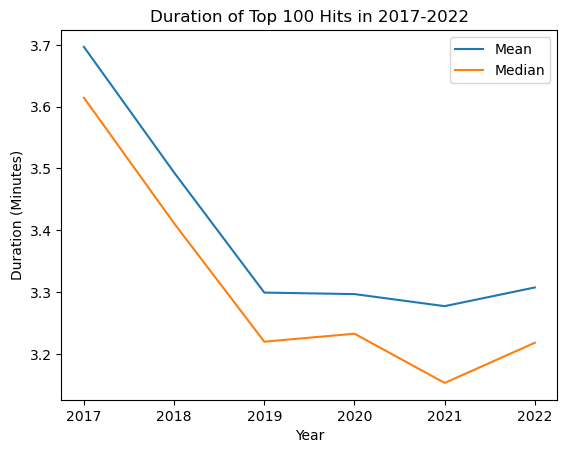

In [5]:
# Create line plot
plt.plot(years, duration_mean_minf, label="Mean")
plt.plot(years, duration_median_minf, label="Median")
plt.legend()
plt.title("Duration of Top 100 Hits in 2017-2022")
plt.xlabel("Year")
plt.ylabel("Duration (Minutes)")

# Save and show the line plot
plt.savefig("../output_data/duration_line.png")
plt.show()

In [6]:
# Verify data validity of data
# Assembling the resulting series into a DataFrame
duration_minf_df = pd.DataFrame({
                         "Year": range(2017,2023),
                         "Mean Duration (Min)": duration_mean_minf, 
                         "Median Duration (Min)": duration_median_minf, 
                         "Duration Variance": duration_var_minf, 
                         "Duration Std Dev (Min)": duration_std_minf, 
                         "Duration Std Error (Min)": duration_sem_minf})
duration_minf_df = duration_minf_df.set_index("Year")
duration_minf_df

,Mean Duration (Min),Median Duration (Min),Duration Variance,Duration Std Dev (Min),Duration Std Error (Min)
Year,,,,,
2017,3.696559,3.614300,0.377447,0.614367,0.061437
2018,3.493342,3.411150,0.473991,0.688470,0.068847
2019,3.299159,3.219750,0.411002,0.641094,0.064109
2020,3.296727,3.232642,0.387976,0.622877,0.062288
2021,3.277226,3.153033,0.832665,0.912505,0.091250
2022,3.307454,3.218025,0.444619,0.666797,0.066680


##### For both the median and mean duration of the top 100 Spotify hits of the year, there is a downward trend from 2017 to 2022. The drop from 2017 to 2019 is the most significant. The average duration of top hits in 2019 is around 0.4 minutes (~24 seconds) shorter than the hits in 2017. From 2019 to 2022, top hit songs remain similar.
##### Both the mean duration and median duration of the top songs were the lowest in 2021. The standard deviation of the data in 2021 is 0.91, which is drastically higher than in other years. We will look into the cause of the high standard deviation value.

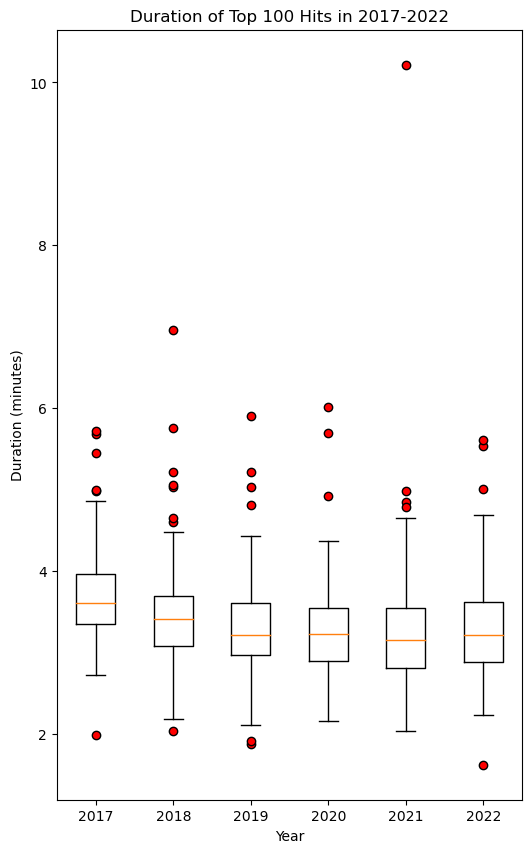

In [13]:
# Duration vs year (boxplot)
    
# Create Boxplot
fig1, ax1 = plt.subplots(figsize=(6,10))
ax1.boxplot(duration_minf, labels = years, flierprops = dict(markersize = 6, markerfacecolor = "red"))
ax1.set_title("Duration of Top 100 Hits in 2017-2022")
ax1.set_xlabel("Year")
ax1.set_ylabel("Duration (minutes)")

# Save and show the boxplot
plt.savefig("../output_data/duration_box.png")
plt.show()

In [8]:
#Finding the longest song in 2021
songs_2021_df = spoti_df[spoti_df["Year"] == 2021].copy()
songs_2021_df["duration_minutes"] = mil_to_minf(songs_2021_df["duration_ms"])
songs_2021_df = songs_2021_df[["track name","artist name","duration_minutes"]].sort_values(by = "duration_minutes", ascending = False)
songs_2021_df.iloc[0,:]

track name          All Too Well (10 Minute Version) (Taylor's Ver...
artist name                                              Taylor Swift
duration_minutes                                            10.217117
Name: 430, dtype: object

##### It is generally true that the duration of the top 100 hit songs becomes shorter from 2017 through 2022. While this trend continued during the period of COVID-19 (2020-2022), there is little evidence to show that COVID-19 is a major factor that contributes to this trend.

##### According to a 2018 study by San Francisco-based engineer Michael Tauberg, the average duration of a track has been steadily decreasing each year since 2000, though fluctuations can be seen in some years.

##### While the trend is that the duration of popular hits has become shorter in recent years, the variety remains large. Based on the boxplot, outliers can be found every year. The most significant one is "All Too Well (10 Minute Version) (Taylor's Version)" by Taylor Swift in 2021. The song is over 10 minutes long, which contributes to the high standard deviation value in that year. Despite the popularity of this long hit, the average duration of the top 100 songs is the lowest in 2021 within the 2017-2022 period.

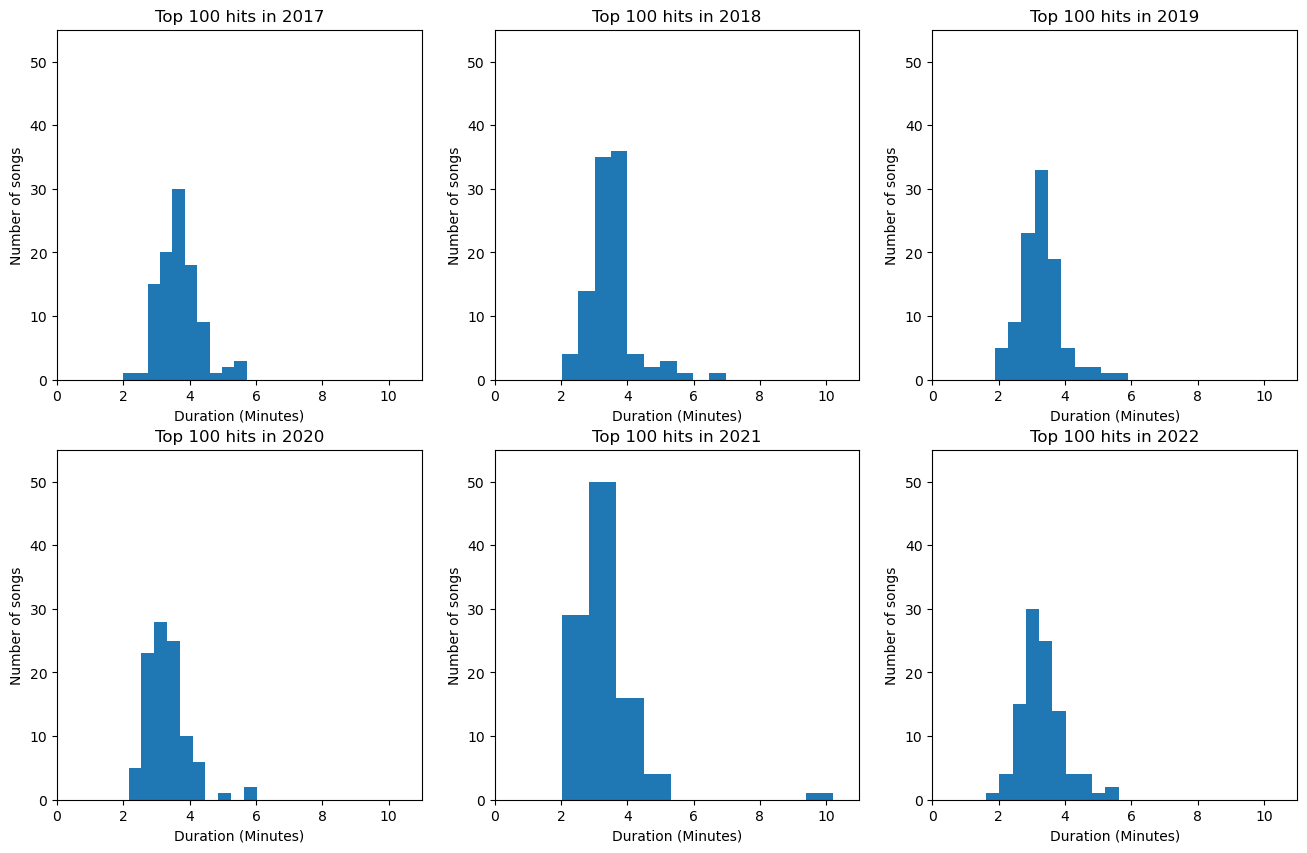

In [9]:
# Duration per year (histogram)
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
custom_xlim = (0, 11)
custom_ylim = (0, 55)
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim, xlabel="Duration (Minutes)", ylabel="Number of songs")

for i in range(6):
    axs[divmod(i,3)[0], divmod(i,3)[1]].hist(duration_minf[i])
    axs[divmod(i,3)[0], divmod(i,3)[1]].set_title(f"Top 100 hits in {years[i]}")

# Save and show the histogram
plt.savefig("../output_data/duration_histogram.png")
plt.show()

##### From 2017 to 2022, there is a shift in the histogram to the left, suggesting that there are more shorter hit songs in 2022 when compared to 2017.

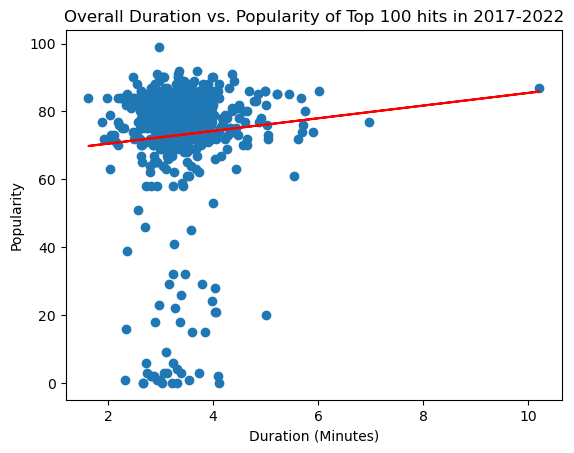

Linear equation: y = 1.87x + 66.78
The r value is: 0.07274074235422119


In [10]:
# Duration vs populartiy overall

duration_ms = spoti_df["duration_ms"]
x_axis = mil_to_minf(duration_ms)
y_axis = spoti_df["track popularity"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color = "red")
plt.title("Overall Duration vs. Popularity of Top 100 hits in 2017-2022")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Popularity")

# Save and show the scatter
plt.savefig("../output_data/duration_popularity_overall.png")
plt.show()
print(f"Linear equation: {line_eq}")
print(f"The r value is: {rvalue}")

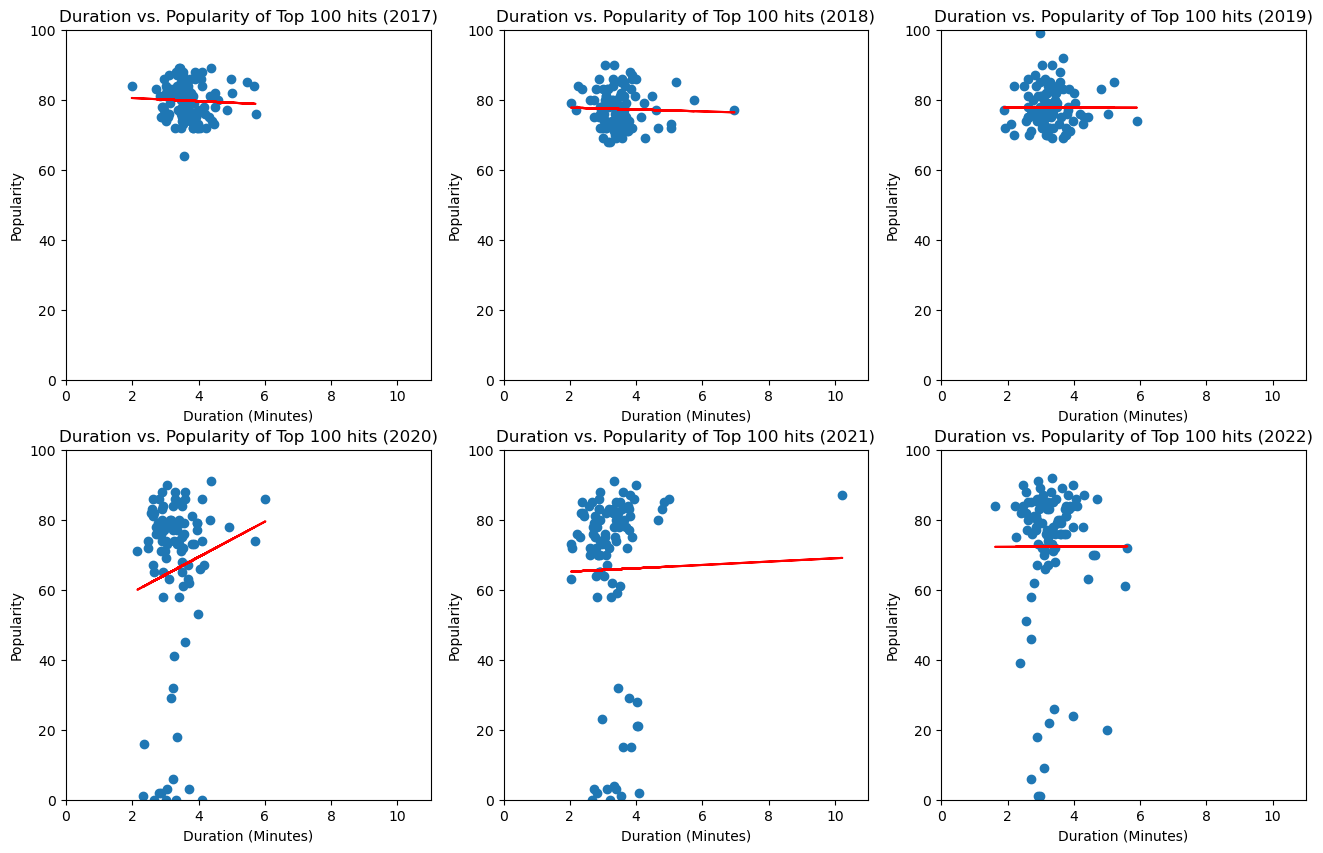

2017 	 Linear equation: y = -0.45x + 81.38 		 r-value: -0.0537
2018 	 Linear equation: y = -0.27x + 78.29 		 r-value: -0.0341
2019 	 Linear equation: y = -0.02x + 77.82 		 r-value: -0.0017
2020 	 Linear equation: y = 5.06x + 49.09 		 r-value: 0.1248
2021 	 Linear equation: y = 0.48x + 64.22 		 r-value: 0.0168
2022 	 Linear equation: y = 0.04x + 72.18 		 r-value: 0.0011


In [11]:
regress_values = []
line_eqs = []
rvalues = []
for i in range(6):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(duration_minf[i], popularity[i])
    regress_value = duration_minf[i] * slope + intercept
    regress_values.append(regress_value)
    line_eqs.append("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
    rvalues.append(rvalue)

# Duration vs popularity per year (Scatter Plot)
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
custom_xlim = (0, 11)
custom_ylim = (0, 100)
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim, xlabel="Duration (Minutes)", ylabel="Popularity")

for i in range(6):
    axs[divmod(i,3)[0], divmod(i,3)[1]].scatter(duration_minf[i], popularity[i])
    axs[divmod(i,3)[0], divmod(i,3)[1]].plot(duration_minf[i],regress_values[i], color = "red")
    axs[divmod(i,3)[0], divmod(i,3)[1]].set_title(f"Duration vs. Popularity of Top 100 hits ({years[i]})")

# Save and show the scatter
plt.savefig("../output_data/duration_popularity_year.png")
plt.show()

for i in range(6):
    print(f"{years[i]} \t Linear equation: {line_eqs[i]} \t\t r-value: {round(rvalues[i],4)}")

##### The average duration of hit songs has become shorter. That leads to the question of whether shorter songs are more popular. Scatter plots are generated to show the correlations between duration and popularity.

##### From the scatter plots, a positive r-value means longer songs are more popular, and a negative r-value means shorter songs are more popular. The R-values are negative in 2017, 2018 and 2019, and they are positive in 2020, 2021 and 2022. Nevertheless, the figures are so close to zero that the correlation between duration and popularity is close to none.

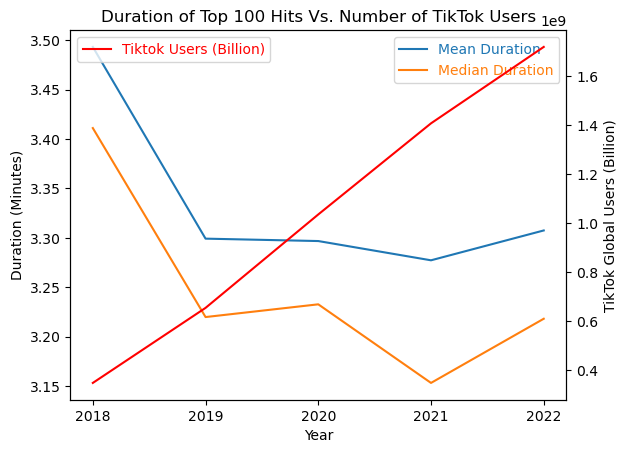

The r-value between mean duration and number of TikTok users is -0.6857056347980467.
The r-value between median duration and number of TikTok users is -0.7333031881659963.


In [12]:
# Line plot vs Tiktok
# code reference
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

tiktok_users = [347100000, 653500000, 1035000000, 1407000000, 1719000000]

fig, ax1 = plt.subplots()
ax1.set_title("Duration of Top 100 Hits Vs. Number of TikTok Users")
ax1.plot(years[1:6], duration_mean_minf[1:6], label = "Mean Duration")
ax1.plot(years[1:6], duration_median_minf[1:6], label = "Median Duration")
ax1.set_xlabel("Year")

plt.xticks(years)
ax1.set_ylabel("Duration (Minutes)")
plt.legend(labelcolor="linecolor")

ax2 = ax1.twinx()
ax2.set_ylabel("TikTok Global Users (Billion)")
ax2.plot(years[1:6], tiktok_users, label = "Tiktok Users (Billion)", color = "red")

plt.legend(labelcolor="linecolor")

# Save and show the line plot
plt.savefig("../output_data/duration_line_tiktok.png")
plt.show()
r_mean = st.pearsonr(duration_mean_minf[1:6], tiktok_users)[0]
r_median = st.pearsonr(duration_median_minf[1:6], tiktok_users)[0]
print(f"The r-value between mean duration and number of TikTok users is {r_mean}.")
print(f"The r-value between median duration and number of TikTok users is {r_median}.")

##### It was suggested by many analysts that the trend of shorter music duration is contributed by the rise of TikTok and other short-form video social media websites. These social media platforms are major causes of shorter audience attention spans. A line plot is created to find out the correlation between music duration and the number of TikTok users. For both mean duration and median duration, the r-value between duration and number of TikTok users is around -0.7, suggesting that the negative correlation between the two is significant enough for further analysis.

Michael Tauberg (27 Apr 2018)
Music is Getting Shorter
https://michaeltauberg.medium.com/music-and-our-attention-spans-are-getting-shorter-8be37b5c2d67

Gary Trust, Billboard (4 Jun 2019)
Billboard Hot 100 Top 10s in 2019 Are, On Average, 30 Seconds Shorter Than Last Year https://www.billboard.com/pro/hot-100-top-10s-30-seconds-shorter-2019/

Elias Leight, Billboard (18 Nov 2022)
https://www.billboard.com/pro/songs-getting-shorter-tiktok-streaming/

Laura Ceci, Statista (23 Aug 2023)
Number of TikTok users worldwide from 2018 to 2027
https://www.statista.com/forecasts/1142687/tiktok-users-worldwide

Gary Trust, Billboard (28 Nov 2023)
André 3000 Breaks Hot 100 Record With 12-Minute, 20-Second Hit From New Album
https://www.billboard.com/lists/andre-3000-breaks-hot-100-record-12-minute-song/1220-i-swear-i-really-wanted-to-make-a-rap-album-but-this-is-literally-the-way-the-wind-blew-me-this-time-andre-3000/
